In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('adult_with_headers (1).csv')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.columns
df.value_counts()

age  workclass         fnlwgt  education     education_num  marital_status      occupation         relationship   race   sex     capital_gain  capital_loss  hours_per_week  native_country  income
25   Private           195994  1st-4th       2              Never-married       Priv-house-serv    Not-in-family  White  Female  0             0             40              Guatemala       <=50K     3
23   Private           240137  5th-6th       3              Never-married       Handlers-cleaners  Not-in-family  White  Male    0             0             55              Mexico          <=50K     2
38   Private           207202  HS-grad       9              Married-civ-spouse  Machine-op-inspct  Husband        White  Male    0             0             48              United-States   >50K      2
30   Private           144593  HS-grad       9              Never-married       Other-service      Not-in-family  Black  Male    0             0             40              ?               <=50K     2


In [6]:
#df_cont = df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]
# df_cat = df[df.columns[[1,3,5,6,7,8,9,13,14]]]
df_cont = df.select_dtypes(include=['int64'])
df_cat = df.select_dtypes(include = ['object'])



In [7]:
import numpy as np

cat_col = df_cat.columns
df[cat_col] = df[cat_col].apply(lambda x: x.str.strip())
df[cat_col] = df[cat_col].replace('?',np.nan)
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [8]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
df[cat_col] = df[cat_col].fillna('Unknown')
df.isna().sum()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
X = df.drop('income', axis = 1)

df['income'] = df['income'].astype(str).str.strip()

Y = df['income'].apply(lambda x: 1 if x == '>50' else 0)
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [11]:
# Clean whitespace first
df['income'] = df['income'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Map correctly
Y = df['income'].map({'>50K': 1, '<=50K': 0})

Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

### Numerical vs Y → boxplots, scatter plots.

### Categorical vs Y → count plots, bar plots.

### All numerical features → correlation heatmap.

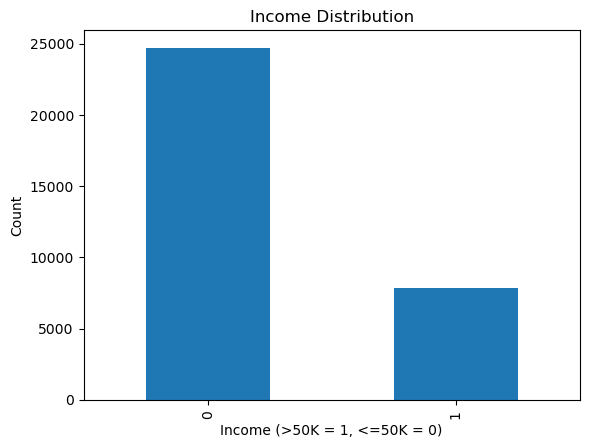

In [12]:
import matplotlib.pyplot as plt

Y.value_counts().plot(kind='bar')
plt.title("Income Distribution")
plt.xlabel("Income (>50K = 1, <=50K = 0)")
plt.ylabel("Count")
plt.show()


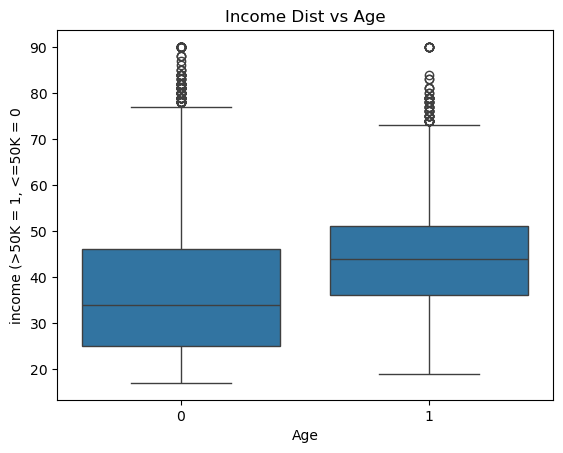

In [13]:
import seaborn as sns

sns.boxplot(x = Y, y = df['age'])
plt.title("Income Dist vs Age")
plt.ylabel("income (>50K = 1, <=50K = 0")
plt.xlabel("Age")
plt.show()
           

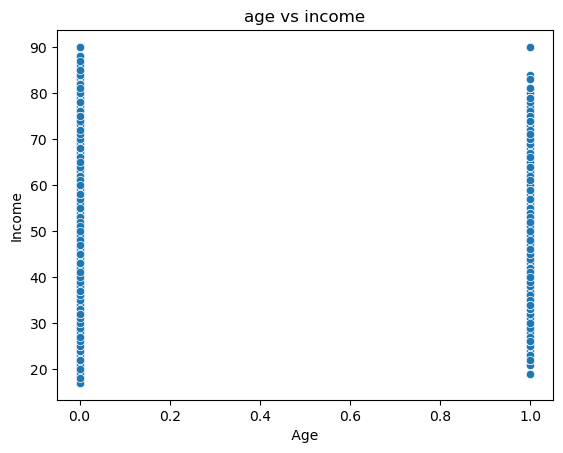

In [14]:
sns.scatterplot(x = Y, y = df['age'])
plt.title("age vs income")
plt.xlabel(" Age ")
plt.ylabel("Income")
plt.show()

<Axes: xlabel='workclass', ylabel='count'>

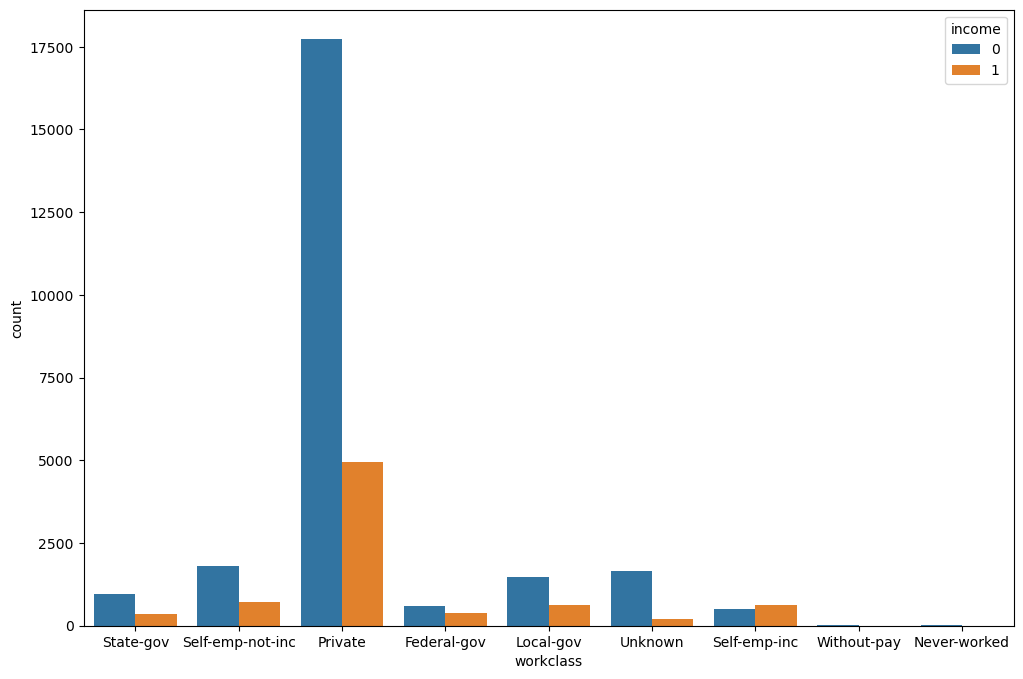

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['workclass'], hue = Y)

### MinMaxScaler:

When you need bounded values (e.g., [0,1])

When features have different units but similar importance

Works well for algorithms that rely on distance metrics (KNN, clustering) or gradient descent (NNs)

### StandardScaler:

When features are normally distributed or approximately Gaussian

When algorithms assume standardized data (SVM, logistic regression, PCA)

More robust if you expect outliers

In [16]:
# StanderdScalar

from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
SS_X = SS.fit_transform(df_cont)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df_cont)
SS_X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [17]:
from sklearn.preprocessing import MinMaxScaler

MM = MinMaxScaler()
MM_X = MM.fit_transform(df_cont)
MM_X = pd.DataFrame(MM_X)
MM_X.columns = list(df_cont)
MM_X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959
...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878


## Discuss the scenarios where each scaling technique is preferred and why
### Standered Scaling:
You generally prefer StandardScaler when your data is approximately normally distributed or when algorithms assume Gaussian‑like inputs 
(eg.. Logistic Regression).

### MinMaxScaling
MinMaxScaler is better when you need values bounded in a fixed range (like [0,1]), especially for neural networks or distance‑based methods.
The choice depends on your data distribution and the algorithm you’re using.

# Encoding Techniques:

In [18]:
cat_col_5 = df_cat[['workclass', 'education','marital_status','occupation']]
cat_col_5

,workclass,education,marital_status,occupation
0,State-gov,Bachelors,Never-married,Adm-clerical
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial
2,Private,HS-grad,Divorced,Handlers-cleaners
3,Private,11th,Married-civ-spouse,Handlers-cleaners
4,Private,Bachelors,Married-civ-spouse,Prof-specialty
...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct
32558,Private,HS-grad,Widowed,Adm-clerical
32559,Private,HS-grad,Never-married,Adm-clerical


In [19]:
## ------------------------ ONE HOT ENCODING --------------------------- ##
from sklearn.preprocessing import OneHotEncoder

#OHE = OneHotEncoder()
#OHE_X = OHE.fit_transform(cat_col_5)
#OHE_X = pd.DataFrame(OHE_X)
# OHE_X.columns = list(cat_col_5)
#OHE_X


from sklearn.preprocessing import OneHotEncoder
import pandas as pd
'''
# Create encoder with dense output
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform
OHE_X = OHE.fit_transform(cat_col_5)

# Convert to DataFrame with proper column names
OHE_X = pd.DataFrame(OHE_X, columns=OHE.get_feature_names_out(cat_col_5.columns))

OHE_X.head()

# Concatenate numerical and categorical features
X_final = pd.concat([SS_X.reset_index(drop=True), OHE_X.reset_index(drop=True)], axis=1)

print(X_final.shape)
X_final.head()
'''
OHE = OneHotEncoder()
d1 = OHE.fit_transform(df_cat[['workclass']]).toarray()

d2 = OHE.fit_transform(df_cat[['education']]).toarray()
d3 = OHE.fit_transform(df_cat[['occupation']]).toarray()


In [20]:
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d3 = pd.DataFrame(d3)




d1.columns = ['Private',
 'Self-emp-not-inc',
 'Local-gov',
 'Unknown',
 'State-gov',
 'Self-emp-inc',
 'Federal-gov',
 'Without-pay',
 'Never-worked']
d2.columns = ['HS-grad',
 'Some-college',
 'Bachelors',
 'Masters',
 'Assoc-voc',
 '11th',
 'Assoc-acdm',
 '10th',
 '7th-8th',
 'Prof-school',
 '9th',
 '12th',
 'Doctorate',
 '5th-6th',
 '1st-4th',
 'Preschool']
d3.columns = ['Prof-specialty',
 'Craft-repair',
 'Exec-managerial',
 'Adm-clerical',
 'Sales',
 'Other-service',
 'Machine-op-inspct',
 'Unknown',
 'Transport-moving',
 'Handlers-cleaners',
 'Farming-fishing',
 'Tech-support',
 'Protective-serv',
 'Priv-house-serv',
 'Armed-Forces']


In [21]:
df['occupation'].value_counts().index.to_list()

['Prof-specialty',
 'Craft-repair',
 'Exec-managerial',
 'Adm-clerical',
 'Sales',
 'Other-service',
 'Machine-op-inspct',
 'Unknown',
 'Transport-moving',
 'Handlers-cleaners',
 'Farming-fishing',
 'Tech-support',
 'Protective-serv',
 'Priv-house-serv',
 'Armed-Forces']

In [27]:
df_cat_OHE = pd.concat([df_cat, d1,d2,d3], axis = 1)
df_cat_OHE

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income,Private,...,Other-service,Machine-op-inspct,Unknown,Transport-moving,Handlers-cleaners,Farming-fishing,Tech-support,Protective-serv,Priv-house-serv,Armed-Forces
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df_cat.columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [39]:
df_cat['relationship'].value_counts().index.tolist()

[' Husband',
 ' Not-in-family',
 ' Own-child',
 ' Unmarried',
 ' Wife',
 ' Other-relative']

In [49]:
df_cat['sex'].value_counts().index.tolist()

[1, 0]

In [54]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
encoders = {}
cat_col_LE = df_cat.copy()

for i in cat_col_LE:
    cat_col_LE[i] = LE.fit_transform(cat_col_LE[i])
    encoders[i] = LE

cat_col_LE

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,0,39,0
32557,4,11,2,7,0,4,1,39,1
32558,4,11,6,1,4,4,0,39,0
32559,4,11,4,1,3,4,1,39,0


In [45]:
### ------------------------------- Lable Encoding -------------------------------- ###
# from sklearn.preprocessing import LabelEncoder
#LE = LabelEncoder()
#d1_sex= LE.fit_transform(df_cat['sex'])
#d2_relationship = LE.fit_transform(df_cat['relationship'])
#d1_sex = pd.DataFrame(d1_sex)
# d2_relationship = pd.DataFrame(d2_relationship)


"\nd1_sex.columns = ['Male', 'Female']\n\nd2_relationship.columns = [' Husband',\n ' Not-in-family',\n ' Own-child',\n ' Unmarried',\n ' Wife',\n ' Other-relative']\n "

In [55]:
SS_X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [56]:
cat_col_LE

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,7,9,4,1,1,4,1,39,0
1,6,9,2,4,0,4,1,39,0
2,4,11,0,6,1,4,1,39,0
3,4,1,2,6,0,2,1,39,0
4,4,9,2,10,5,2,0,5,0
...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,0,39,0
32557,4,11,2,7,0,4,1,39,1
32558,4,11,6,1,4,4,0,39,0
32559,4,11,4,1,3,4,1,39,0


In [66]:
X = pd.concat([SS_X, cat_col_LE], axis=1)
X = X.drop('income', axis=1)
X

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,4,7,2,13,5,4,0,39
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,4,11,2,7,0,4,1,39
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,4,11,6,1,4,4,0,39
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,4,11,4,1,3,4,1,39


In [73]:
Y = pd.DataFrame(Y, columns = ['income'])
Y

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


### Discuss the pros and cons of One-Hot Encoding and Label Encoding.
One-Hot Encoding and Label Encoding are two common ways to convert categorical data into numbers. 
One-Hot Encoding is best for categories without order but increases dimensionality, while Label Encoding is compact but can mislead models that assume numeric order.

In [74]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Feature Engineering
# -----------------------------

# Feature 1: Age Group (career stage)
df['age_group'] = pd.cut(df['age'],
                         bins=[17, 25, 40, 60, 100],
                         labels=['Young Adult', 'Early Career', 'Mid Career', 'Senior'])

# Feature 2: Work Hours Category
df['work_hours_cat'] = pd.cut(df['hours_per_week'],
                              bins=[0, 30, 40, 100],
                              labels=['Part-time', 'Full-time', 'Overtime'])

# -----------------------------
# 2. Transformation
# -----------------------------

# Apply log transformation to skewed feature: capital_gain
df['capital_gain_log'] = np.log1p(df['capital_gain'])  # log1p handles zeros safely

# -----------------------------
# Check results
# -----------------------------
print(df[['age', 'age_group', 'hours_per_week', 'work_hours_cat', 'capital_gain', 'capital_gain_log']].head())


   age     age_group  hours_per_week work_hours_cat  capital_gain  \
0   39  Early Career              40      Full-time          2174   
1   50    Mid Career              13      Part-time             0   
2   38  Early Career              40      Full-time             0   
3   53    Mid Career              40      Full-time             0   
4   28  Early Career              40      Full-time             0   

   capital_gain_log  
0          7.684784  
1          0.000000  
2          0.000000  
3          0.000000  
4          0.000000  


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26048, 14) (6513, 14) (26048, 1) (6513, 1)


In [83]:
LE = LogisticRegression()
LE.fit(X_train,Y_train)

Y_pred_train = LE.predict(X_train)
Y_pred_test = LE.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix

training_score = accuracy_score(Y_train, Y_pred_train)

test_score = accuracy_score(Y_test, Y_pred_test)

print(np.round(training_score,4))
print(np.round(test_score,4))

0.8252
0.8245


In [91]:
from sklearn.model_selection import ShuffleSplit, cross_validate

shuffle_split = ShuffleSplit(n_splits=500, test_size=0.3)

cross_validate = cross_validate(LE, X, Y, cv = shuffle_split, scoring='accuracy', return_train_score= True)

train_score = cross_validate['train_score']
test_score = cross_validate['test_score']

print(np.round(train_score,2).mean())
print(np.round(test_score,2).mean())



0.8242
0.82374
